In [5]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [95]:
%run ../cow.py
%run ../optimize_pkg.py

In [7]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
tx_SNR_range = arange(0, -10*log10(protocol_target), 0.01)
protocolbit = 4*10**4
user_range = arange(2, 36, 1)

In [43]:
filepath_down = "../data_tables/shannon_tables/n"
filepath_up = "../data_tables/shannon_tables/n"
extension = ".in"

# Optimize 1

In [67]:
%%time
rx_SNR_range = arange(-17, 12, 0.1)
tx_SNR_range = arange(0, 50, 0.01)
optimize_1_data = zeros((34, 5))
for N in user_range:
    optimize_1_data[N-user_range[0]] = optimize_1(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)
    print N, optimize_1_data[N-user_range[0]]

2 [   -16.49           30.9         13333.33333333  13333.33333333
  13333.33333333]
3 [   -14.7            18.64        13333.33333333  13333.33333333
  13333.33333333]
4 [ -1.34300000e+01   1.27200000e+01   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
5 [ -1.24300000e+01   9.31000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
6 [ -1.16200000e+01   7.11000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
7 [ -1.09200000e+01   5.63000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
8 [ -1.03200000e+01   4.56000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
9 [ -9.78000000e+00   3.78000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
10 [ -9.30000000e+00   3.18000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
11 [ -8.86000000e+00   2.72000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
12 [ -8.46000000e+00   2.36000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
13 [ -8.09000000e

[[ -1.64900000e+01   3.09000000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.47000000e+01   1.86400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.34300000e+01   1.27200000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.24300000e+01   9.31000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.16200000e+01   7.11000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.09200000e+01   5.63000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.03200000e+01   4.56000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -9.78000000e+00   3.78000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -9.30000000e+00   3.18000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -8.86000000e+00   2.72000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -8.46000000e+00   2.36000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -8.0900

//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


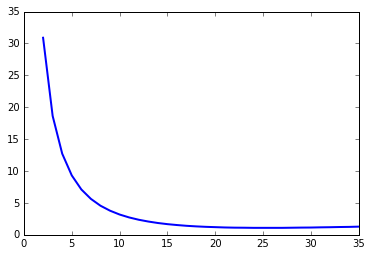

In [6]:
print optimize_1_data
plot(user_range, optimize_1_data[:,1], lw=2.0)

# Optimize 3

In [59]:
%%time
optimize_3_data = zeros((34, 5))
for N in user_range:
    print "=== N {0} ===".format(N)
    tx_SNR_range = arange(tx_SNR_range_dct[N], 50, 0.01)
    optimize_3_data[N-user_range[0]] = optimize_3(N, rx_SNR_start_dct[N], tx_SNR_range, filepath_down, filepath_up, protocolbit)
    print optimize_3_data[N-user_range[0]]
    
# print optimize_3_data

=== N 2 ===
[-16.4   30.99   0.     0.     0.  ]
=== N 3 ===
[ -1.47000000e+01   1.86400000e+01   7.99360578e-11   7.99360578e-11
   7.99360578e-11]
=== N 4 ===
[-13.4   12.75   0.     0.     0.  ]
=== N 5 ===
[-12.4    9.34   0.     0.     0.  ]
=== N 6 ===
[-11.6    7.13   0.     0.     0.  ]
=== N 7 ===
[-10.9    5.65   0.     0.     0.  ]
=== N 8 ===
[-10.3    4.58   0.     0.     0.  ]
=== N 9 ===
[-9.7   3.86  0.    0.    0.  ]
=== N 10 ===
[ -9.30000000e+00   3.26000000e+00   1.56674673e-10   1.56674673e-10
   1.56674673e-10]
=== N 11 ===
[-8.8   2.78  0.    0.    0.  ]
=== N 12 ===
[-8.4   2.42  0.    0.    0.  ]
=== N 13 ===
[-8.    2.17  0.    0.    0.  ]
=== N 14 ===
[-7.7   1.89  0.    0.    0.  ]
=== N 15 ===
[-7.4   1.69  0.    0.    0.  ]
=== N 16 ===
[-7.1   1.54  0.    0.    0.  ]
=== N 17 ===
[-6.8   1.44  0.    0.    0.  ]
=== N 18 ===
[-6.5   1.37  0.    0.    0.  ]
=== N 19 ===
[-6.2   1.34  0.    0.    0.  ]
=== N 20 ===
[-6.    1.24  0.    0.    0.  ]
=== N 21 ==

# Optimize 5

In [24]:
# Does this make sense for Shannon?

# 21 is arbitrary quantization taken from Hamming quantization
# 1400 = min bits for one phase, 4200 = entire protocol
# shannon_table(rate)
class node_table_shannon():
    op_SNR = arange(-26, -3, 0.01)

    def __init__(self, n):
        self.num_node = n
        minb = n * 160 * 7 / 4
        bitrange = arange(minb, 40000-minb, 21)
        self.bitrange = bitrange
#         num_tables = len(bitrange)
        self.tables = {}
        for b in self.bitrange:
            self.tables[b] = shannon_table(n*160/b, self.op_SNR)

In [10]:
filepath_shannon = '../data_tables/optimize_shannon/n'

In [25]:
%%time
node = node_table_shannon(1)
print node.bitrange

[   280.    301.    322. ...,  39676.  39697.  39718.]
CPU times: user 6.32 s, sys: 64.8 ms, total: 6.39 s
Wall time: 6.37 s


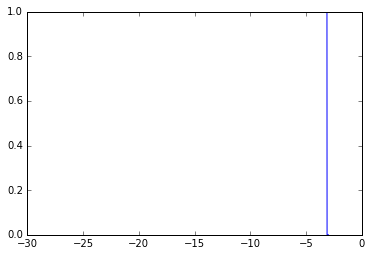

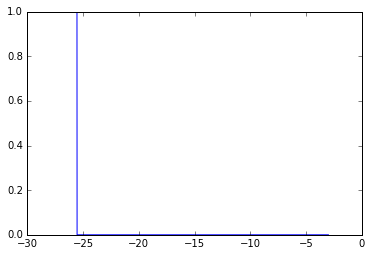

In [23]:
plot(node.tables[280][0],  node.tables[280][1])

figure()
plot(node.tables[39718][0],  node.tables[39718][1])

In [26]:
%%time
for num_nodes in arange(35, 0, -1):
    node = node_table_shannon(num_nodes)
    filename = filepath_shannon + str(num_nodes) + '.in'
    save_table(node, filename)

CPU times: user 4min 12s, sys: 5.63 s, total: 4min 17s
Wall time: 4min 18s


In [36]:
%%time
for N in user_range:
    print "=== N {0} ===".format(N)
    tx_SNR_range = arange(0, 50, 1)
    for linktarget in [10**i for i in range(-10, 0)]:
        z = optimize_4_shannon(N, tx_SNR_range, filepath_shannon, protocolbit, linktarget)
        print linktarget, " : ", z[1]

=== N 2 ===
1e-10  :  44
1e-09  :  44
1e-08  :  44
1e-07  :  44
1e-06  :  44
1e-05  :  44
0.0001  :  44
0.001  :  44
0.01  :  44
0.1  :  44
=== N 3 ===
1e-10  :  30
1e-09  :  30
1e-08  :  30
1e-07  :  30
1e-06  :  30
1e-05  :  30
0.0001  :  30
0.001  :  30
0.01  :  30
0.1  :  30
=== N 4 ===
1e-10  :  23
1e-09  :  23
1e-08  :  23
1e-07  :  23
1e-06  :  23
1e-05  :  23
0.0001  :  23
0.001  :  23
0.01  :  23
0.1  :  23
=== N 5 ===
1e-10  :  18
1e-09  :  18
1e-08  :  18
1e-07  :  18
1e-06  :  18
1e-05  :  18
0.0001  :  18
0.001  :  18
0.01  :  18
0.1  :  18
=== N 6 ===
1e-10  :  15
1e-09  :  15
1e-08  :  15
1e-07  :  15
1e-06  :  15
1e-05  :  15
0.0001  :  15
0.001  :  15
0.01  :  15
0.1  :  15
=== N 7 ===
1e-10  :  13
1e-09  :  13
1e-08  :  13
1e-07  :  13
1e-06  :  13
1e-05  :  13
0.0001  :  13
0.001  :  13
0.01  :  13
0.1  :  13
=== N 8 ===
1e-10  :  11
1e-09  :  11
1e-08  :  11
1e-07  :  11
1e-06  :  11
1e-05  :  11
0.0001  :  11
0.001  :  11
0.01  :  11
0.1  :  11
=== N 9 ===
1e-10  :

In [53]:
%%time
# rx_SNR_start = -17
shannon_5 = zeros((len(user_range), 8))
for N in user_range:
    tx_SNR_range = arange(-5, 50, 0.01)
    for linktarget in [10**(-10)]:
        shannon_5[N-user_range[0]] = optimize_4_shannon(N, rx_SNR_start_dct[N], tx_SNR_range, filepath_shannon, protocolbit, linktarget)
        
print shannon_5[:,1]

[ 30.7  18.5  12.5   9.1   6.9   5.4   4.3   3.6   3.    2.5   2.2   1.9
   1.6   1.4   1.3   1.2   1.1   1.    1.    0.9   0.9   0.9   0.9   0.9
   0.9   0.9   0.8   0.9   0.9   1.    0.9   1.    1.    1.1]
CPU times: user 49min 45s, sys: 13.4 s, total: 49min 59s
Wall time: 1h 6min 54s


In [56]:
%%time
shannon_5 = zeros((len(user_range), 8))
for N in user_range:
    tx_SNR_range = arange(tx_SNR_range_dct[N], 50, 0.01)
    for linktarget in [10**(-10)]:
        shannon_5[N-user_range[0]] = optimize_4_shannon(N, rx_SNR_start_dct[N], tx_SNR_range, filepath_shannon, protocolbit, linktarget)
        
print shannon_5[:,1]

[ 30.69  18.44  12.45   9.04   6.83   5.35   4.28   3.56   2.98   2.48
   2.12   1.87   1.59   1.39   1.24   1.14   1.07   0.94   0.94   0.86
   0.9    0.87   0.84   0.84   0.84   0.86   0.79   0.83   0.87   0.93
   0.89   0.96   0.93   1.01]
CPU times: user 4min 18s, sys: 3.52 s, total: 4min 22s
Wall time: 4min 23s


In [102]:
%%time
shannon_5 = zeros((len(user_range), 8))
for N in user_range:
    tx_SNR_range = arange(tx_SNR_range_dct[N], 50, 0.01)
    for linktarget in [10**(-10)]:
        shannon_5[N-user_range[0]] = optimize_4_shannon(N, rx_SNR_start_dct[N], tx_SNR_range, filepath_shannon, protocolbit, linktarget, 0.01)
        
print shannon_5[:,0]
print shannon_5[:,1]

[-17.74 -15.96 -14.69 -13.7  -12.9  -12.21 -11.61 -11.08 -10.6  -10.17
  -9.78  -9.4   -9.07  -8.75  -8.45  -8.17  -7.9   -7.65  -7.4   -7.18
  -6.9   -6.7   -6.5   -6.3   -6.1   -5.9   -5.8   -5.6   -5.4   -5.2   -5.1
  -4.9   -4.8   -4.6 ]
[ 29.65  17.38  11.46   8.04   5.83   4.34   3.27   2.48   1.88   1.41
   1.04   0.77   0.52   0.34   0.19   0.07  -0.03  -0.11  -0.16  -0.22
  -0.2   -0.23  -0.26  -0.26  -0.26  -0.24  -0.31  -0.27  -0.23  -0.17
  -0.21  -0.14  -0.17  -0.09]
CPU times: user 23min 12s, sys: 9.36 s, total: 23min 21s
Wall time: 23min 32s


In [101]:
rx_SNR_start_dct = {N: (shannon_5[N-2, 0] - 1) for N in user_range}
tx_SNR_range_dct = {N: (shannon_5[N-2, 1] - 1) for N in user_range}
print tx_SNR_range_dct
print rx_SNR_start_dct

{2: 29.589999999999886, 3: 17.339999999999918, 4: 11.349999999999936, 5: 7.9399999999999498, 6: 5.7299999999999578, 7: 4.2499999999999627, 8: 3.179999999999966, 9: 2.459999999999968, 10: 1.8799999999999697, 11: 1.3799999999999715, 12: 1.0199999999999738, 13: 0.76999999999997537, 14: 0.48999999999997645, 15: 0.28999999999997716, 16: 0.13999999999997748, 17: 0.039999999999977831, 18: -0.030000000000022342, 19: -0.16000000000002124, 20: -0.16000000000002124, 21: -0.24000000000002086, 22: -0.20000000000002083, 23: -0.23000000000002085, 24: -0.26000000000002088, 25: -0.26000000000002088, 26: -0.26000000000002088, 27: -0.24000000000002086, 28: -0.31000000000002048, 29: -0.27000000000002089, 30: -0.23000000000002085, 31: -0.17000000000002125, 32: -0.21000000000002084, 33: -0.14000000000002122, 34: -0.17000000000002125, 35: -0.090000000000021729}
{2: -17.799999999999997, 3: -15.99999999999997, 4: -14.799999999999953, 5: -13.799999999999939, 6: -12.999999999999927, 7: -12.299999999999917, 8: -1

In [104]:
print "Optimization 1"
print optimize_1_data[:,1]
print "\n Optimization 3"
print optimize_3_data[:,1]
print "\n Optimization 5"
print shannon_5[:,1]

Optimization 1
[ 30.9   18.64  12.72   9.31   7.11   5.63   4.56   3.78   3.18   2.72
   2.36   2.08   1.85   1.67   1.53   1.41   1.32   1.25   1.2    1.15
   1.12   1.11   1.09   1.09   1.09   1.09   1.11   1.13   1.14   1.17
   1.19   1.22   1.24   1.28]

 Optimization 3
[ 30.99  18.64  12.75   9.34   7.13   5.65   4.58   3.86   3.26   2.78
   2.42   2.17   1.89   1.69   1.54   1.44   1.37   1.34   1.24   1.16
   1.2    1.17   1.14   1.14   1.14   1.16   1.19   1.23   1.17   1.23
   1.29   1.26   1.33   1.31]

 Optimization 5
[ 29.65  17.38  11.46   8.04   5.83   4.34   3.27   2.48   1.88   1.41
   1.04   0.77   0.52   0.34   0.19   0.07  -0.03  -0.11  -0.16  -0.22
  -0.2   -0.23  -0.26  -0.26  -0.26  -0.24  -0.31  -0.27  -0.23  -0.17
  -0.21  -0.14  -0.17  -0.09]


In [108]:
print optimize_1_data[:,1] - shannon_5[:,1]

[ 1.25  1.26  1.26  1.27  1.28  1.29  1.29  1.3   1.3   1.31  1.32  1.31
  1.33  1.33  1.34  1.34  1.35  1.36  1.36  1.37  1.32  1.34  1.35  1.35
  1.35  1.33  1.42  1.4   1.37  1.34  1.4   1.36  1.41  1.37]


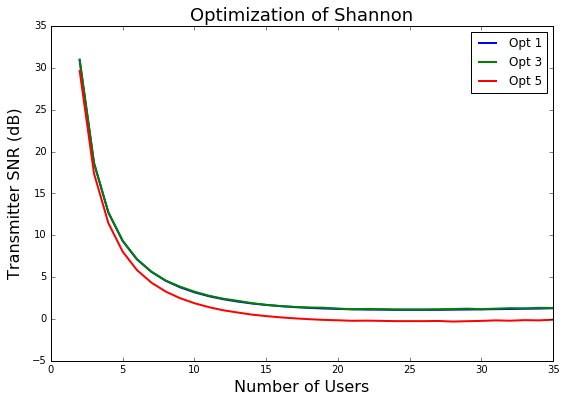

In [106]:
figure(figsize=(9,6))
plot(user_range, optimize_1_data[:,1], lw=2.0, label='Opt 1')
plot(user_range, optimize_3_data[:,1], lw=2.0, label='Opt 3')
plot(user_range, shannon_5[:,1], lw=2.0, label='Opt 5')
legend(loc=0)
xlabel('Number of Users', fontsize=16)
ylabel('Transmitter SNR (dB)', fontsize=16, labelpad=10)
title('Optimization of Shannon', fontsize=18)
savefig('opt_shannon.pdf', bbox='tight')

In [100]:
print "Downlink Blocklength (bits)"
print shannon_5[:,2]
print "\n Uplink Blocklength (bits)"
print shannon_5[:,3]
print "\n XOR Blocklength (bits)"
print shannon_5[:,4]

Downlink Blocklength (bits)
[ 10766.  10731.  10906.  10871.  10920.  10885.  10892.  10731.  10696.
  10787.  10773.  10717.  10808.  10878.  10885.  10850.  10773.  10906.
  10787.  10857.  10696.  10724.  10752.  10759.  10745.  10710.  10885.
  10829.  10773.  10696.  10829.  10731.  10843.  10745.]

 Uplink Blocklength (bits)
[ 10766.  10731.  10906.  10871.  10920.  10885.  10892.  10731.  10696.
  10787.  10773.  10717.  10808.  10878.  10885.  10850.  10773.  10906.
  10787.  10857.  10696.  10724.  10752.  10759.  10745.  10710.  10885.
  10829.  10773.  10696.  10829.  10731.  10843.  10745.]

 XOR Blocklength (bits)
[ 18468.  18538.  18188.  18258.  18160.  18230.  18216.  18538.  18608.
  18426.  18454.  18566.  18384.  18244.  18230.  18300.  18454.  18188.
  18426.  18286.  18608.  18552.  18496.  18482.  18510.  18580.  18230.
  18342.  18454.  18608.  18342.  18538.  18314.  18510.]


In [71]:
print "Downlink Target Probability"
print shannon_5[:,5]
print "\n Uplink Target Probability"
print shannon_5[:,6]
print "\n XOR Target Probability"
print shannon_5[:,7]

Downlink Target Probability
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 Uplink Target Probability
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 XOR Target Probability
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


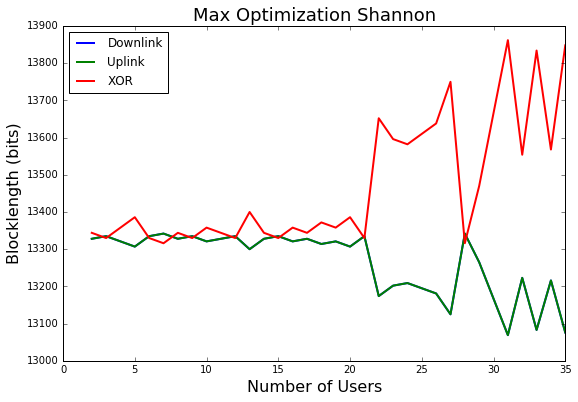

In [105]:
figure(figsize=(9, 6))
plot(user_range, shannon_5[:,2], lw=2.0, label='Downlink')
plot(user_range, shannon_5[:,3], lw=2.0, label='Uplink')
plot(user_range, shannon_5[:,4], lw=2.0, label='XOR')
legend(loc=0)
xlabel('Number of Users', fontsize=16)
ylabel('Blocklength (bits)', fontsize=16)
title('Max Optimization Shannon', fontsize=18)
savefig('opt_shannon_blocklength.pdf', bbox='tight')

## Shannon + Waterfall Gaps for Naive Prediction

In [76]:
print {'transmitter': shannon_5[:,1]}

{'transmitter': array([ 30.69,  18.44,  12.45,   9.04,   6.83,   5.35,   4.28,   3.56,
         2.98,   2.48,   2.12,   1.87,   1.59,   1.39,   1.24,   1.14,
         1.07,   0.94,   0.94,   0.86,   0.9 ,   0.87,   0.84,   0.84,
         0.84,   0.86,   0.79,   0.83,   0.87,   0.93,   0.89,   0.96,
         0.93,   1.01])}


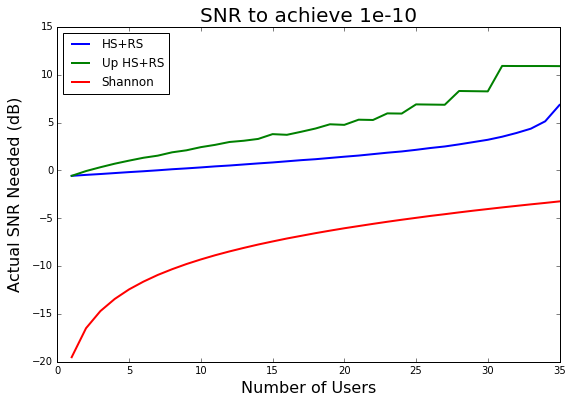

In [83]:
threshold = 10**(-10)

shannonthresh = zeros(35)
hsrsthresh = zeros(35)
uphsrsthresh = zeros(35)

for N in range(1,36):
#     rate = N*160/10000

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_downlink/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    hsrsthresh[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_uplink/n' + str(N) + '.in'
    uphsrstable = load_table(filename)
    uphsrsthresh[N-1] = uphsrstable[0][np.where(np.array(uphsrstable[1])<=threshold)[0][0]]

figure(figsize=(9, 6))
plot(range(1,36), hsrsthresh, lw=2.0, label='HS+RS')
plot(range(1, 36), uphsrsthresh, lw=2.0, label='Up HS+RS')
plot(range(1,36), shannonthresh, lw=2.0, label='Shannon')
xlabel('Number of Users', fontsize=16)
ylabel('Actual SNR Needed (dB)', fontsize=16, labelpad=10)
title('SNR to achieve {0}'.format(threshold), fontsize=20)
legend(loc=0)

In [87]:
gap = zeros((2, 35))
gap[0] = hsrsthresh - shannonthresh
gap[1] = uphsrsthresh - shannonthresh
print gap
print gap.max(axis=0)

[[ 18.96  16.03  14.33  13.16  12.26  11.54  10.94  10.45  10.     9.62
    9.29   8.98   8.72   8.48   8.26   8.07   7.91   7.73   7.6    7.48
    7.37   7.29   7.22   7.14   7.11   7.1    7.08   7.11   7.17   7.24
    7.39   7.62   7.91   8.53  10.08]
 [ 18.96  16.43  15.04  14.14  13.46  12.95  12.47  12.22  11.89  11.74
   11.54  11.44  11.2   11.04  11.22  10.84  10.88  10.94  11.12  10.81
   11.12  10.86  11.33  11.1   11.86  11.64  11.44  12.69  12.49  12.3
   14.79  14.62  14.46  14.31  14.14]]
[ 18.96  16.43  15.04  14.14  13.46  12.95  12.47  12.22  11.89  11.74
  11.54  11.44  11.2   11.04  11.22  10.84  10.88  10.94  11.12  10.81
  11.12  10.86  11.33  11.1   11.86  11.64  11.44  12.69  12.49  12.3
  14.79  14.62  14.46  14.31  14.14]


In [90]:
print {'naive prediction': shannon_5[:,1] + gap.max(axis=0)[1:]}

{'naive prediction': array([ 47.12,  33.48,  26.59,  22.5 ,  19.78,  17.82,  16.5 ,  15.45,
        14.72,  14.02,  13.56,  13.07,  12.63,  12.61,  12.08,  12.02,
        12.01,  12.06,  11.75,  11.98,  11.76,  12.2 ,  11.94,  12.7 ,
        12.48,  12.3 ,  13.48,  13.32,  13.17,  15.72,  15.51,  15.42,
        15.24,  15.15])}
